<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Time Series Analysis and Modeling

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **time series analysis and modeling**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Time Series Analysis](https://youtu.be/nxY1HS3SrQ4?si=VSYYO2bqBd_ftb4u)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Time Series Analysis and Modeling

Time series data is typically 1D over time. This data may be univariate, bivariate or multivariate. So why not just apply regular machine learning methods in 1D? There are many unique aspects for time series analysis and modeling that preclude this:

* time series phenomenon are often highly nonstationary with trends and cyclicity
* time series models are often focused on forecasting, i.e., significant extrapolation 
* over the observed time interval the data is usually dense, and often exhaustive with sampling at the same rate as applied in the trained model

As result, we need a unique set of tools, analysis and models to address time series phenomenon. 

#### Time Series Analysis and Modeling

Time series analysis for learning from time series data. Here are some key aspects of time series analysis and modeling.

**One Dimensional**

* whereas spatial data is typically over 2 or 3 dimensions and multivariate data may have any dimension in feature space, time series data is fundamentally a 1D dataset with measures over $y(\bf{t_{\alpha}})$, for $\alpha = 1, \dots, n$ samples typically observed at a constant rate. 

**Compositional**

* time series data may often be decomposed into separate additive or multiplicative trend, seasonal and residual components.

* any model will need to account for each of these components

**Autocorrelation**

* the autocorrelation is commonly applied to quantify the degree information shared over intervals of time.

* note autocorrelation is known as the correlogram in geostatistics and the principals, calculation and modeling procedures are the same.
    
**Nonstationary**

* time series data are often nonstationary and are commonly evaluated with moving window statistics to characterize and model changes over time

* the choice of moving window size is analogous (although not exactly equivalent) to the k hyperparameter for k-nearest neighbour models. 

#### Examples of Time Series Analysis

There are many well-known, important examples of time series analysis:

1. local and global CO2 emisions that are applied to model and forecast climate change
2. mill efficiency measured as recover rate of mineral extraction from the plan feed to forecast mineral production
3. rate of natural gas production for a well in a specific reservoir to determine the number of well needed to meet local energy needs

In addition, there are many systems with mixed multivariate with time series phenomenon. For the above,

1. inclusion of population, GDP and efficiency measures to improve the CO2 emission forecasts
2. inclusion of mineral grades, mining schedule and plant down time to improve mill mineral production forecasts
3. inclusion of local models of facies, porosity and permeability models to improve well natural gas production forecasts.

While multivariate is important, for this brevity I only cover univariate time series analysis and modeling here.

#### What Do I Cover?

For time series analysis, modeling and prediction the following is included:

* Formatting time series dataset

* Basic time series visualization

* Autocorrelation analysis

* Trend modeling and differencing for detrending

* Time Series Decomposition with ARIMA modeling and forecasting

#### Load the required libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.71


We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
ignore_warnings = True                                        # ignore warnings?

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,FuncFormatter) # control of axes ticks
import matplotlib.dates as mdates                             # manually format date display
from statsmodels.tsa.stattools import acf, pacf               # autocorrelation and partical autocorrelation
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
from statsmodels.tsa.stattools import acf, pacf               # autocorrelation and partial autocorrelation
from statsmodels.tsa.stattools import adfuller                # Dickey-Fulley test for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose       # decomposition time series model
from statsmodels.tsa.arima.model import ARIMA                 # ARIMA time series model
import pmdarima as pm                                         # autotune for ARIMA
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [7]:
def comma_format(x, pos):
    return f'{int(x):,}'

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [9]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Generating a Synthetic Time Series

We will build a simple time series representing production at an hypothetical lithium (Li) mine, where we have daily measurements of lithium recovery in tonnes per day. 

* We will use an additive model with trend, cycles and stochastic noise (short scale continuity) features
* I have left the synthetic data generation workflow here, instead of just putting the resulting dataset on GitHub, to allow you to change the synthetic dataset and experiment with the following time series analysis and modeling workflow

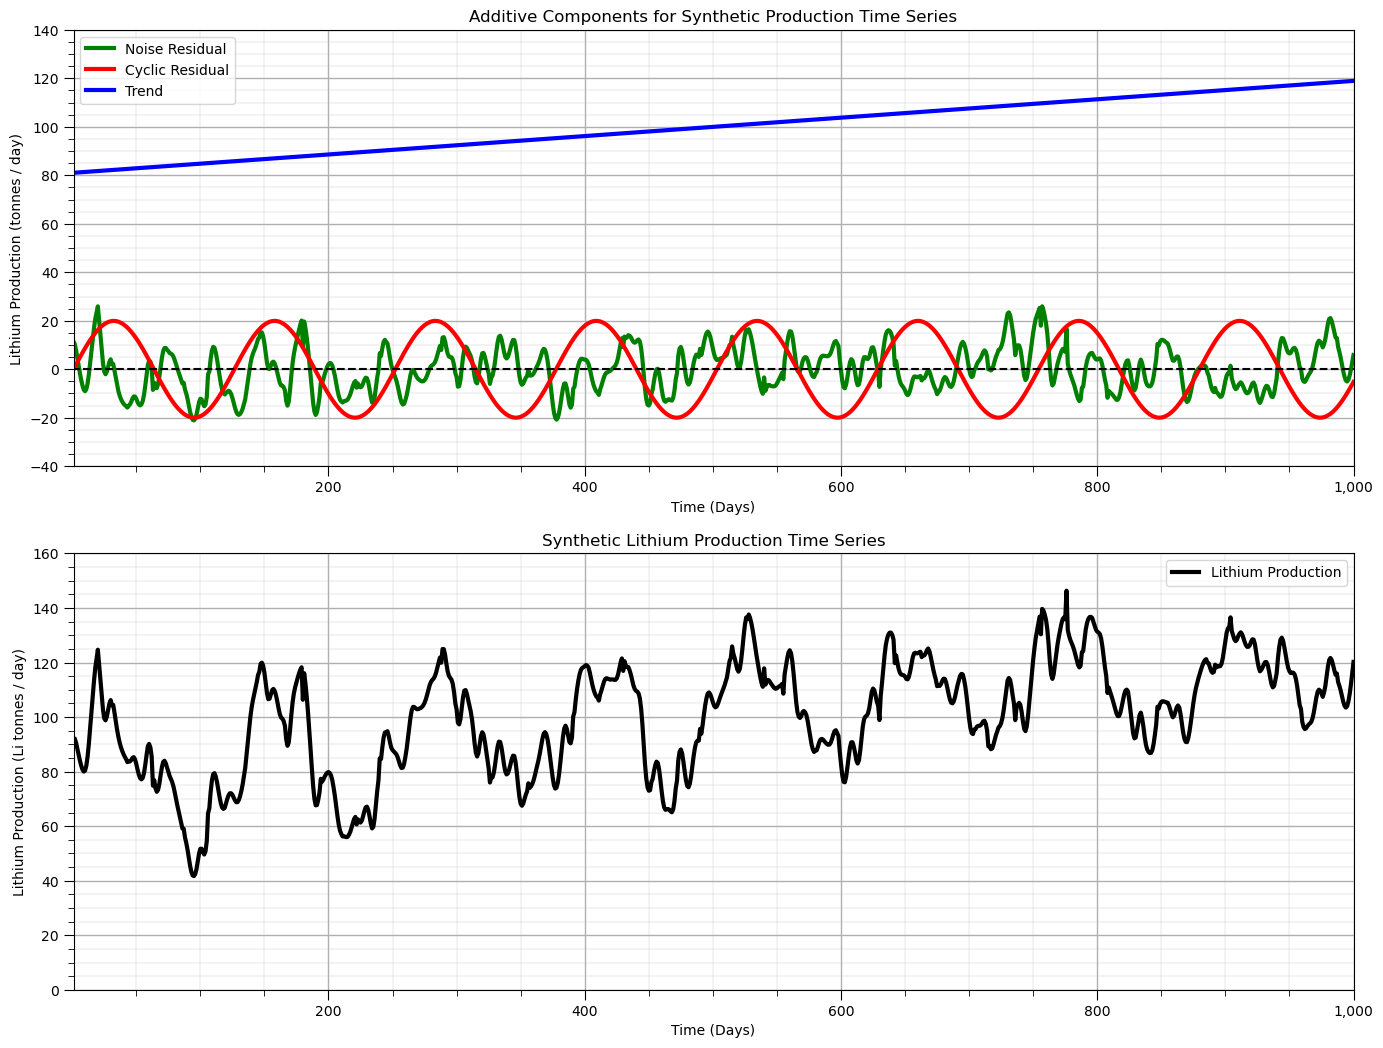

In [11]:
%%capture --no-display    

target_mean = 100.0; target_stdev = 20.0                      # target mean and standard deviation of the synthetic dataset

prop_trend = 0.3; prop_cycle = 0.5; prop_noise = 1 - (prop_trend + prop_cycle)
trend_mean = target_mean; cycle_mean = 0.0; noise_mean = 0.0
noise_stdev = math.sqrt(prop_noise*(target_stdev**2.0))
trend_stdev = math.sqrt(prop_trend*(target_stdev**2.0)); cycle_stdev = math.sqrt(prop_cycle*(target_stdev**2.0))
noise_stdev = math.sqrt(prop_noise*(target_stdev**2.0))

nx = 1000; ny = 1; xsiz = 1.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1 # model window
xmin = 0.0; xmax = nx*xsiz; ymin = 0.0; ymax = ny*ysiz; cmap = plt.cm.inferno

ndmin = 0; ndmax = 30; radius = 1000; ktype = 0; skmean = 0; tmin = -999; tmax = 999 # geostatistical simulation parameters
     
x_value = np.linspace(1,nx,nx)                                # array with the days for the observations
    
vario_noise = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=90.0,hmaj1=10,hmin1=1) # assumed spatial continuity models  

x = np.ones(10)*-9999; y = np.ones(10)*-9999; value = np.random.normal(10) # reference data for forward and back transformation
df_null = pd.DataFrame({'x': x, 'y': y, 'value':value})           # make a new DataFrame from the vectors
series_noise = geostats.sgsim(df_null,'x','y','value',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=0,ismooth=0,dftrans=0,tcol=0, # noise component
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=75053,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=1,nmult=3,noct=-1,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario_noise)[0][0]
series_noise = GSLIB.affine(series_noise,noise_mean,noise_stdev)  # correct the mean and variance of the noise field

series_cycle = np.sin(np.linspace(0,nx*xsiz,nx)/20)           # calculate a cyclic component
series_cycle = GSLIB.affine(series_cycle,cycle_mean,cycle_stdev) # correct the cyclic component mean and variance

series_trend = x_value; series_trend = GSLIB.affine(series_trend,trend_mean,trend_stdev) # trend component

series_total = series_trend + series_cycle + series_noise; series_total = GSLIB.affine(series_total,target_mean,target_stdev)

plt.subplot(211)
plt.plot(x_value,series_noise,color='green',linewidth=3,label = 'Noise Residual')
plt.plot(x_value,series_cycle,color='red',linewidth=3,label = 'Cyclic Residual')
plt.plot(x_value,series_trend,color='blue',linewidth=3,label = 'Trend'); plt.plot([xmin,xmax],[0,0],color='black',ls='--')
plt.legend(loc='best'); plt.xlabel('Time (Days)'); plt.ylabel('Lithium Production (tonnes / day)'); 
plt.title('Additive Components for Synthetic Production Time Series')
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()
plt.xlim([np.min(x_value),np.max(x_value)]); plt.ylim([-40,140])

plt.subplot(212)
plt.plot(x_value,series_total,color='black',linewidth=3, label = 'Lithium Production')
plt.legend(loc='best'); plt.xlabel('Time (Days)'); plt.ylabel('Lithium Production (Li tonnes / day)'); 
plt.title('Synthetic Lithium Production Time Series')
plt.xlim([np.min(x_value),np.max(x_value)]); plt.ylim([0.0,160]); add_grid()
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.2); plt.show()

#### Time Series DataFrame

Let's make a pandas DataFrame with the lithium production data indexed by date of the production. We utilize the useful functionality with Pandas' DataFrames to work with time series data, this includes:

* the ability to use various time formats for display
* to do calculations in time, like the number of day between to 2 dates in year, month and day of the month, i.e., Pandas knows the calendar!

To do this we make date index parameterized by a start date, the number of periods (number of values in our model above, nx) and the sampling frequency 'D' indicating daily. 

* we set this as the data field for the DataFrame and set this to be the DataFrame's index.

In [13]:
start_date = '2016-01-01'; periods = nx
date = pd.date_range(start_date,periods=periods,freq='D')     # make a list of dates for DataFrame index and plotting

df = pd.DataFrame({'date':date[:],'production':series_total[:]}) # make time DataFrame
df = df.set_index(['date']); df.head()
date_list = date.tolist()

We can take advantage of the ability to easily work with and plot time series data with pandas DataFrames.

* we added some improved formatting, including custom date intervals and labels on the x axis

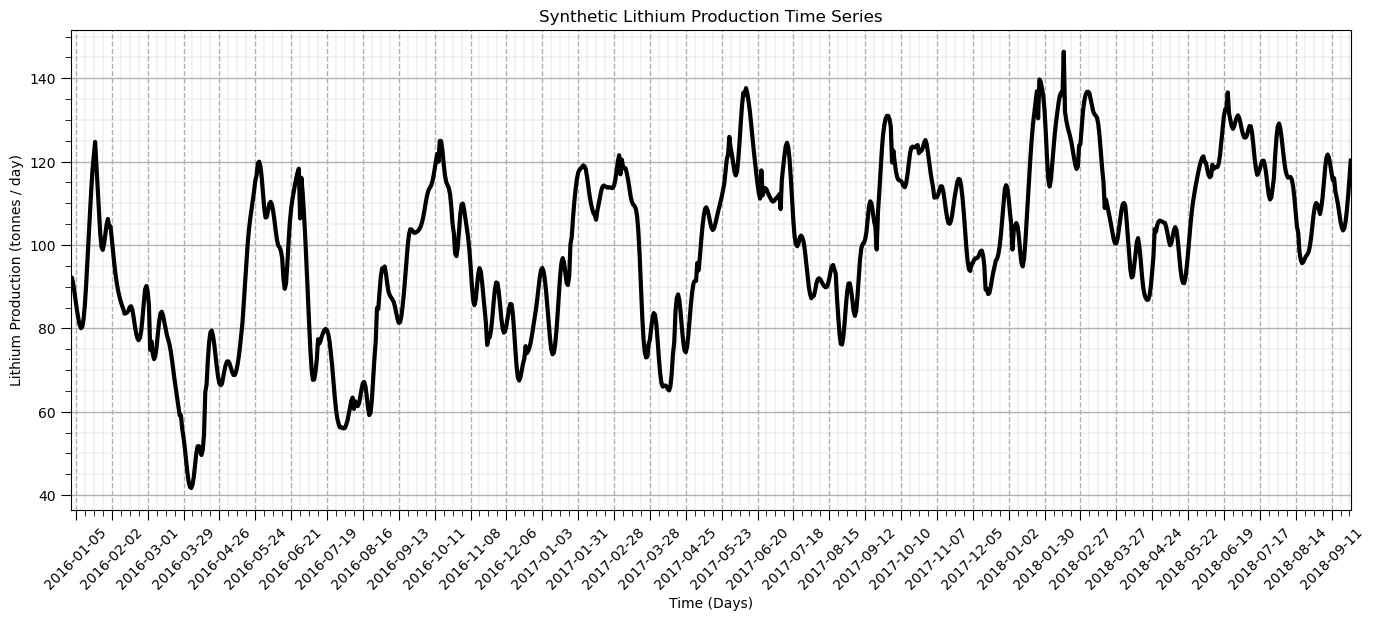

In [15]:
ax = df['production'].plot(color='black',lw=3)
ax.grid(which='major', axis='x', linestyle='--')              # customize major gridlines
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid()                           # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.ylabel('Lithium Production (tonnes / day)'); plt.title('Synthetic Lithium Production Time Series')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

That's a good plot for time series data. Now let's start doing analysis with our lithium production data.

#### Autocorrelation

Autocorrelation is applied in time series analysis to detect relationships over lags in time.  The autocorrelation is the correlogram (standardized covariance function) commonly used in geostatistics applied to the one dimensional time series data.

Also, for the calculation of a predictive model we often check for the presence of autocorrelation between error residual values.
* we will use the autocorrelation and partial autocorrelation of our residual

The partial autocorrelation provides a measure of the correlation after removal of differences observed in previous lags
* measure of correlation at lag $ = n$, after removing the effects explained over lags $ 1, \ldots, n-1$.

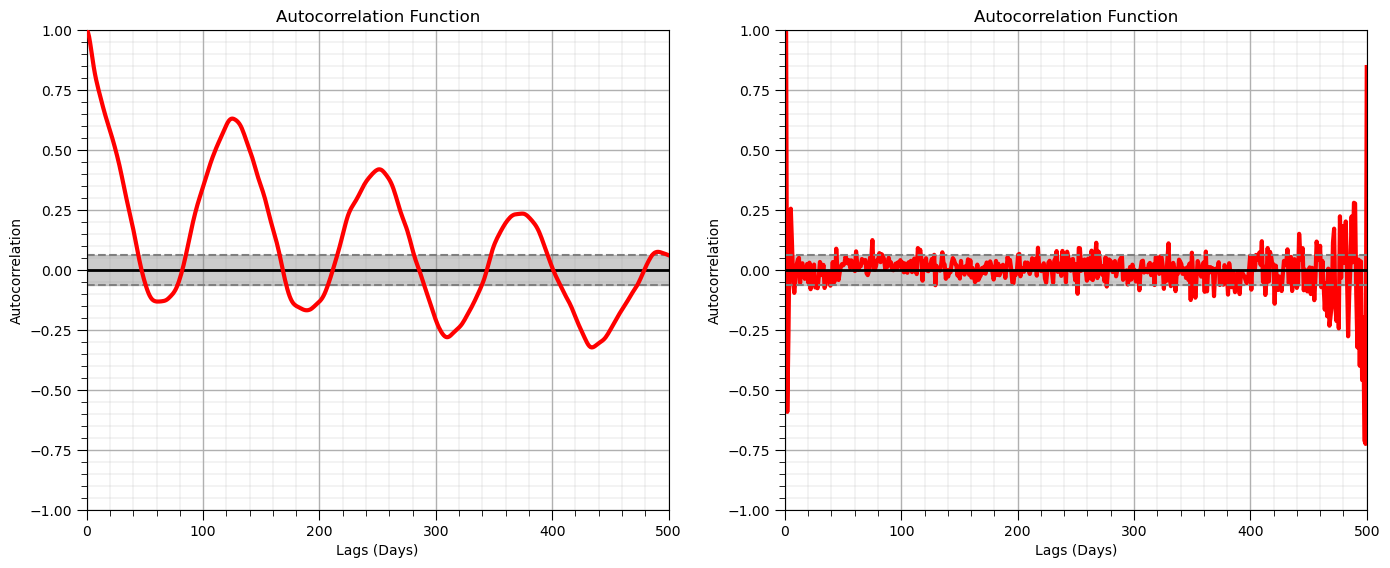

In [17]:
nlag = 499                                                    # number of lags for autocorrelation analysis   

lag_acf = acf(df['production'], nlags=nlag)                   # calculate autocorrelation and partial autocorrelation functions
lag_pacf = pacf(df['production'], nlags=nlag, method='ols')
lags = np.linspace(0,(nlag+1)*xsiz,nlag+1)

#Plot ACF: 
plt.subplot(121)                                              # plot autocorrelation function
plt.plot(lags,lag_acf,color='red',lw=3,zorder=10)
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.fill_between(lags,-1.96/np.sqrt(len(series_noise)),1.96/np.sqrt(len(series_noise)),color='grey',alpha=0.4,zorder=1)
plt.title('Autocorrelation Function'); plt.xlabel('Lags (Days)'); plt.ylabel('Autocorrelation')
add_grid(); plt.xlim([0,nlag+1]); plt.ylim([-1.0,1.0])

plt.subplot(122)                                              # plot partial autocorrelation function
plt.plot(lags,lag_pacf,color='red',lw=3)
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.fill_between(lags,-1.96/np.sqrt(len(series_noise)),1.96/np.sqrt(len(series_noise)),color='grey',alpha=0.4,zorder=1)
plt.title('Partial Autocorrelation Function'); plt.title('Autocorrelation Function'); plt.xlabel('Lags (Days)'); plt.ylabel('Autocorrelation')
add_grid(); plt.xlim([0,nlag+1]); plt.ylim([-1.0,1.0])
plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Test for Stationarity

Is this dataset stationary? Does the mean change locally? We use the Dickey-Fuller Test to test for stationarity of our time series with the following hypotheses:

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less then the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [19]:
print('Dickey-Fuller Test Results:')
dftest = adfuller(df['production'], autolag='AIC')            # perfrom the Dickey-Fuller test for non-stationarity
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                  -3.639408
p-value                          0.005051
#Lags Used                       8.000000
Number of Observations Used    991.000000
Critical Value (1%)             -3.436966
Critical Value (5%)             -2.864461
Critical Value (10%)            -2.568325
dtype: float64


Since the test statistic within the +/- the critical value interval (at 5%) and the p-value is > 5% we would fail to reject the null hypothesis that the dataset is stationary, we assume it is nonstationary.

* What do we need to do about our nonstationary time series data?

#### Stationarity Transformations for Time Series

Most time series models (like spatial models) require a stationarity assumption.

To transform time series to stationary we must model and remove:

* trends - locally variable mean over the domain of the time series
* seasonality - repeating cycles with a specific wavelength

#### Rolling, Moving Window Statistics

We calculate moving window statistics to evaluate the local change in these statistics.  

* visually observe the local changes continuously over the time series
* can be calculated on a wide range of statistics

We evaluate the moving window mean and sample standard deviation over a window of 20 days.

* assuming a uniform weighting of the statistics
* could consider triangular and Gaussian weighting templates for smoother results

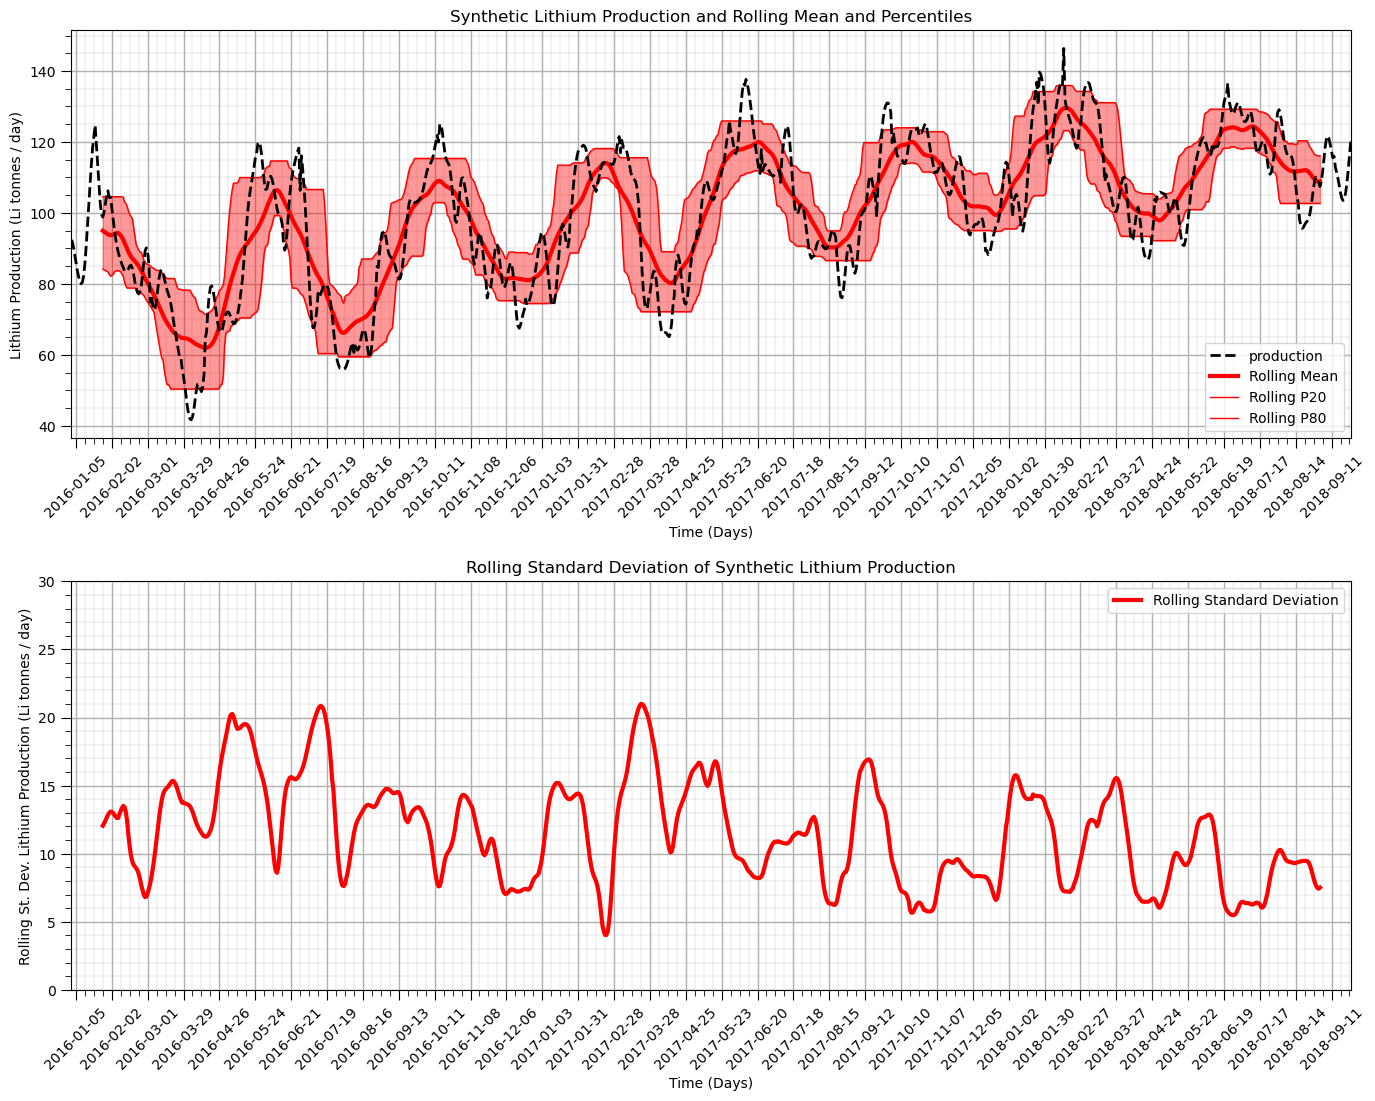

In [21]:
window_size = 50                                              # assume window size of 10 days
alpha = 0.40                                                  # alpha for percentiles, symmetric probability interval = 1 - alpha

df['rolling_mean'] = df['production'].rolling(window = window_size, center = True).mean() # moving window statistics
df['rolling_std'] = df['production'].rolling(window = window_size, center = True).std()
df['rolling_lower'] = df['production'].rolling(window = window_size, center = True).quantile(alpha/2.0)
df['rolling_upper'] = df['production'].rolling(window = window_size, center = True).quantile(1-alpha/2.0)

plt.subplot(211)                                              # plot rolling statistics:
ax = df['production'].plot(color='black',lw=2,ls='--',zorder=50)
df['rolling_mean'].plot(color='red',lw=3,label='Rolling Mean',zorder=20)
df['rolling_lower'].plot(color='red',lw=1,label='Rolling P' + str(int(alpha*100/2)),zorder=20)
df['rolling_upper'].plot(color='red',lw=1,label='Rolling P' + str(int(100-alpha*100/2)),zorder=20)
plt.fill_between(date,df['rolling_lower'],df['rolling_upper'],color='red',alpha=0.4)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid(); plt.legend(loc='lower right') # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.ylabel('Lithium Production (Li tonnes / day)')
plt.title('Synthetic Lithium Production and Rolling Mean and Percentiles')
    
plt.subplot(212)
ax = df['rolling_std'].plot(color='red',lw=3,label='Rolling Standard Deviation')
plt.legend(loc='best'); plt.title('Rolling Standard Deviation')
plt.xlim([date[0],date[-1]]); plt.ylim([0,30]); add_grid()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid()                           # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.ylabel('Rolling St. Dev. Lithium Production (Li tonnes / day)')
plt.title('Rolling Standard Deviation of Synthetic Lithium Production')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.35); plt.show()

#### Working with Residuals

Let's remove (subtract) the moving window average from the original production time series and calculate the residual.

In [23]:
df['residual'] = df['production'].values - df['rolling_mean'].values # calculate residual
df.head(n=13)

,production,rolling_mean,rolling_std,rolling_lower,rolling_upper,residual
date,,,,,,
2016-01-01,92.256458,NaN,NaN,NaN,NaN,NaN
2016-01-02,92.126548,NaN,NaN,NaN,NaN,NaN
2016-01-03,90.593619,NaN,NaN,NaN,NaN,NaN
2016-01-04,88.403908,NaN,NaN,NaN,NaN,NaN
2016-01-05,86.129658,NaN,NaN,NaN,NaN,NaN
2016-01-06,84.041801,NaN,NaN,NaN,NaN,NaN
2016-01-07,82.224334,NaN,NaN,NaN,NaN,NaN
2016-01-08,80.794563,NaN,NaN,NaN,NaN,NaN
2016-01-09,80.045364,NaN,NaN,NaN,NaN,NaN


We have some 'NaN', missing values because the moving window does not calculate values when the window overlaps with the edge of the data.  

* We will have to deal with these in the following workflow.

Now let's plot and visualize the residual.

* It should be more stationary

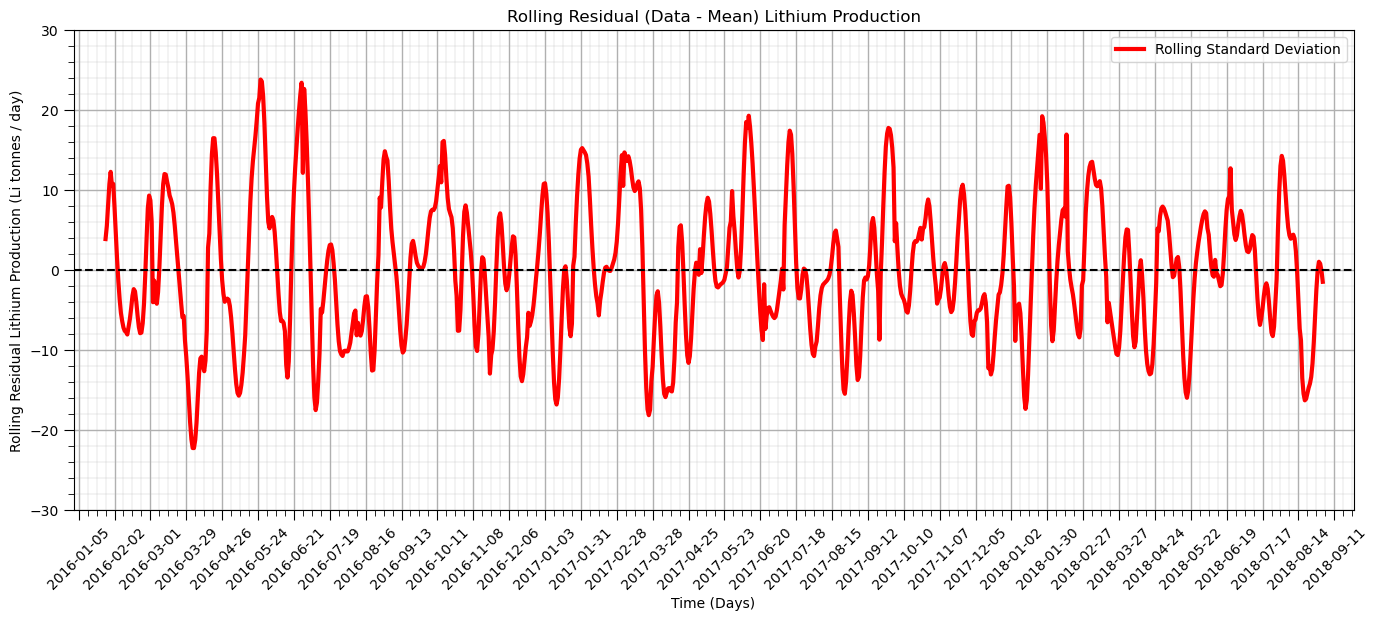

In [25]:
nlag = 499                                                    # number of lags for autocorrelation analysis   

ax = df['residual'].plot(color='red',lw=3,label='Rolling Standard Deviation')
plt.legend(loc='best'); plt.title('Rolling Standard Deviation')
plt.xlim([date[0],date[-1]]); plt.ylim([-30,30])
plt.plot([date[0],date[-1]],[0,0],color='black',ls='--')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid()                           # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.ylabel('Rolling Residual Lithium Production (Li tonnes / day)')
plt.title('Rolling Residual (Data - Mean) Lithium Production')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The residual after we remove the trend is more stationary as anticipated.

Let's try a variety of window sizes.

* 20 days
* 40 days
* 100 days

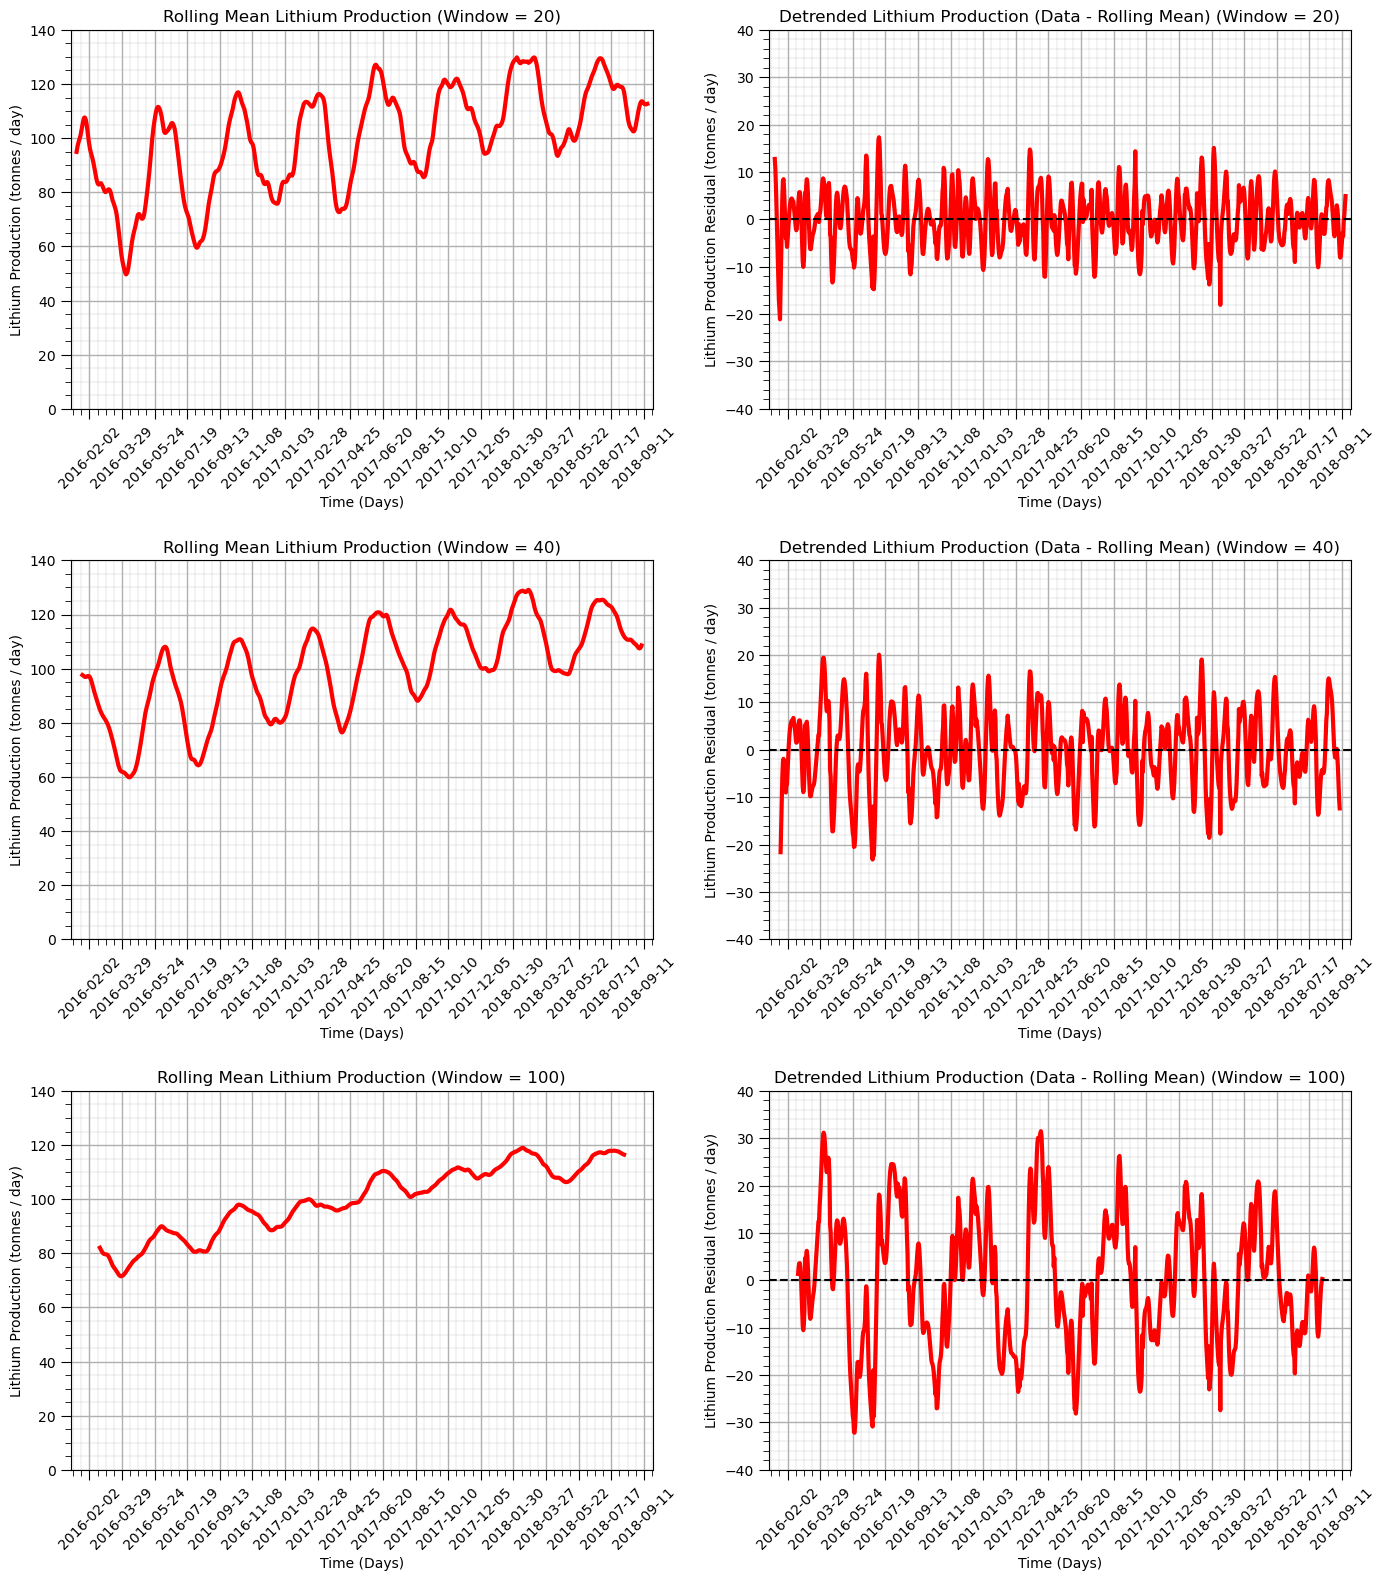

In [27]:
windows = [20,40,100]                                         # specify 3 moving window sizes

for iwin,window in enumerate(windows):                        # calculate rolling window mean and residual
    df['rolling_mean_'+str(window)] = df['production'].rolling(window = window, center = True).mean()
    df['rolling_res_'+str(window)] = df['rolling_mean_'+str(window)] - df['production']

    plt.subplot(3,2,iwin*2+1)                                 # plot rolling mean
    ax = df['rolling_mean_'+str(window)].plot(color='red',lw=3,label='Lithium Production',zorder=20)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))  # major tick every 2 weeks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
    plt.xticks(rotation=45); add_grid(); plt.xlim([date[0],date[-1]]); plt.ylim([0,140])  # rotate date labels for better readability
    plt.xlabel('Time (Days)'); plt.title('Rolling Mean Lithium Production (Window = ' + str(window) + ')')
    plt.ylabel('Lithium Production (tonnes / day)')

    plt.subplot(3,2,iwin*2+2)                                 # plot detrended residual
    ax = df['rolling_res_'+str(window)].plot(color='red',lw=3,label='Lithium Production',zorder=20)
    plt.plot([date[0],date[-1]],[0,0],color='black',ls='--',zorder=50)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8)) # major tick every 2 weeks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
    plt.xticks(rotation=45); add_grid(); plt.xlim([date[0],date[-1]]); plt.ylim([-40,40])  # rotate date labels for better readability
    plt.xlabel('Time (Days)'); plt.title('Detrended Lithium Production (Data - Rolling Mean) (Window = ' + str(window) + ')')
    plt.ylabel('Lithium Production Residual (tonnes / day)') 

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.4); plt.show()

#### Additivity of Variance Trend and Residual Components and Residual Distribution Checks

When we work with a trend and residual model we are decomposing the temporal phenomenon into:

1. deterministic trend - known
2. stochastic residual - unknown

We will calculated the proportion of variance in the trend and the residual.  This includes the following steps:

* calculate the representative weighted standard deviation of the original data, convert to variance, $\sigma$

* calculate the standard deviation of the trend model, convert to variance, $\sigma_t$

* calculate the variance of the residual at the data locations, $\sigma_r$ 

* back calculate the covariance form the relationship:

$$
\sigma^2 = \sigma^2_t + \sigma^2_r + 2 \times C_{tr}
$$

We also check the residual univariate distribution. We are checking for:

* residual mean close to zero
* minimum and maximum residual for extreme values
* monomodal, symmetric distribution shape

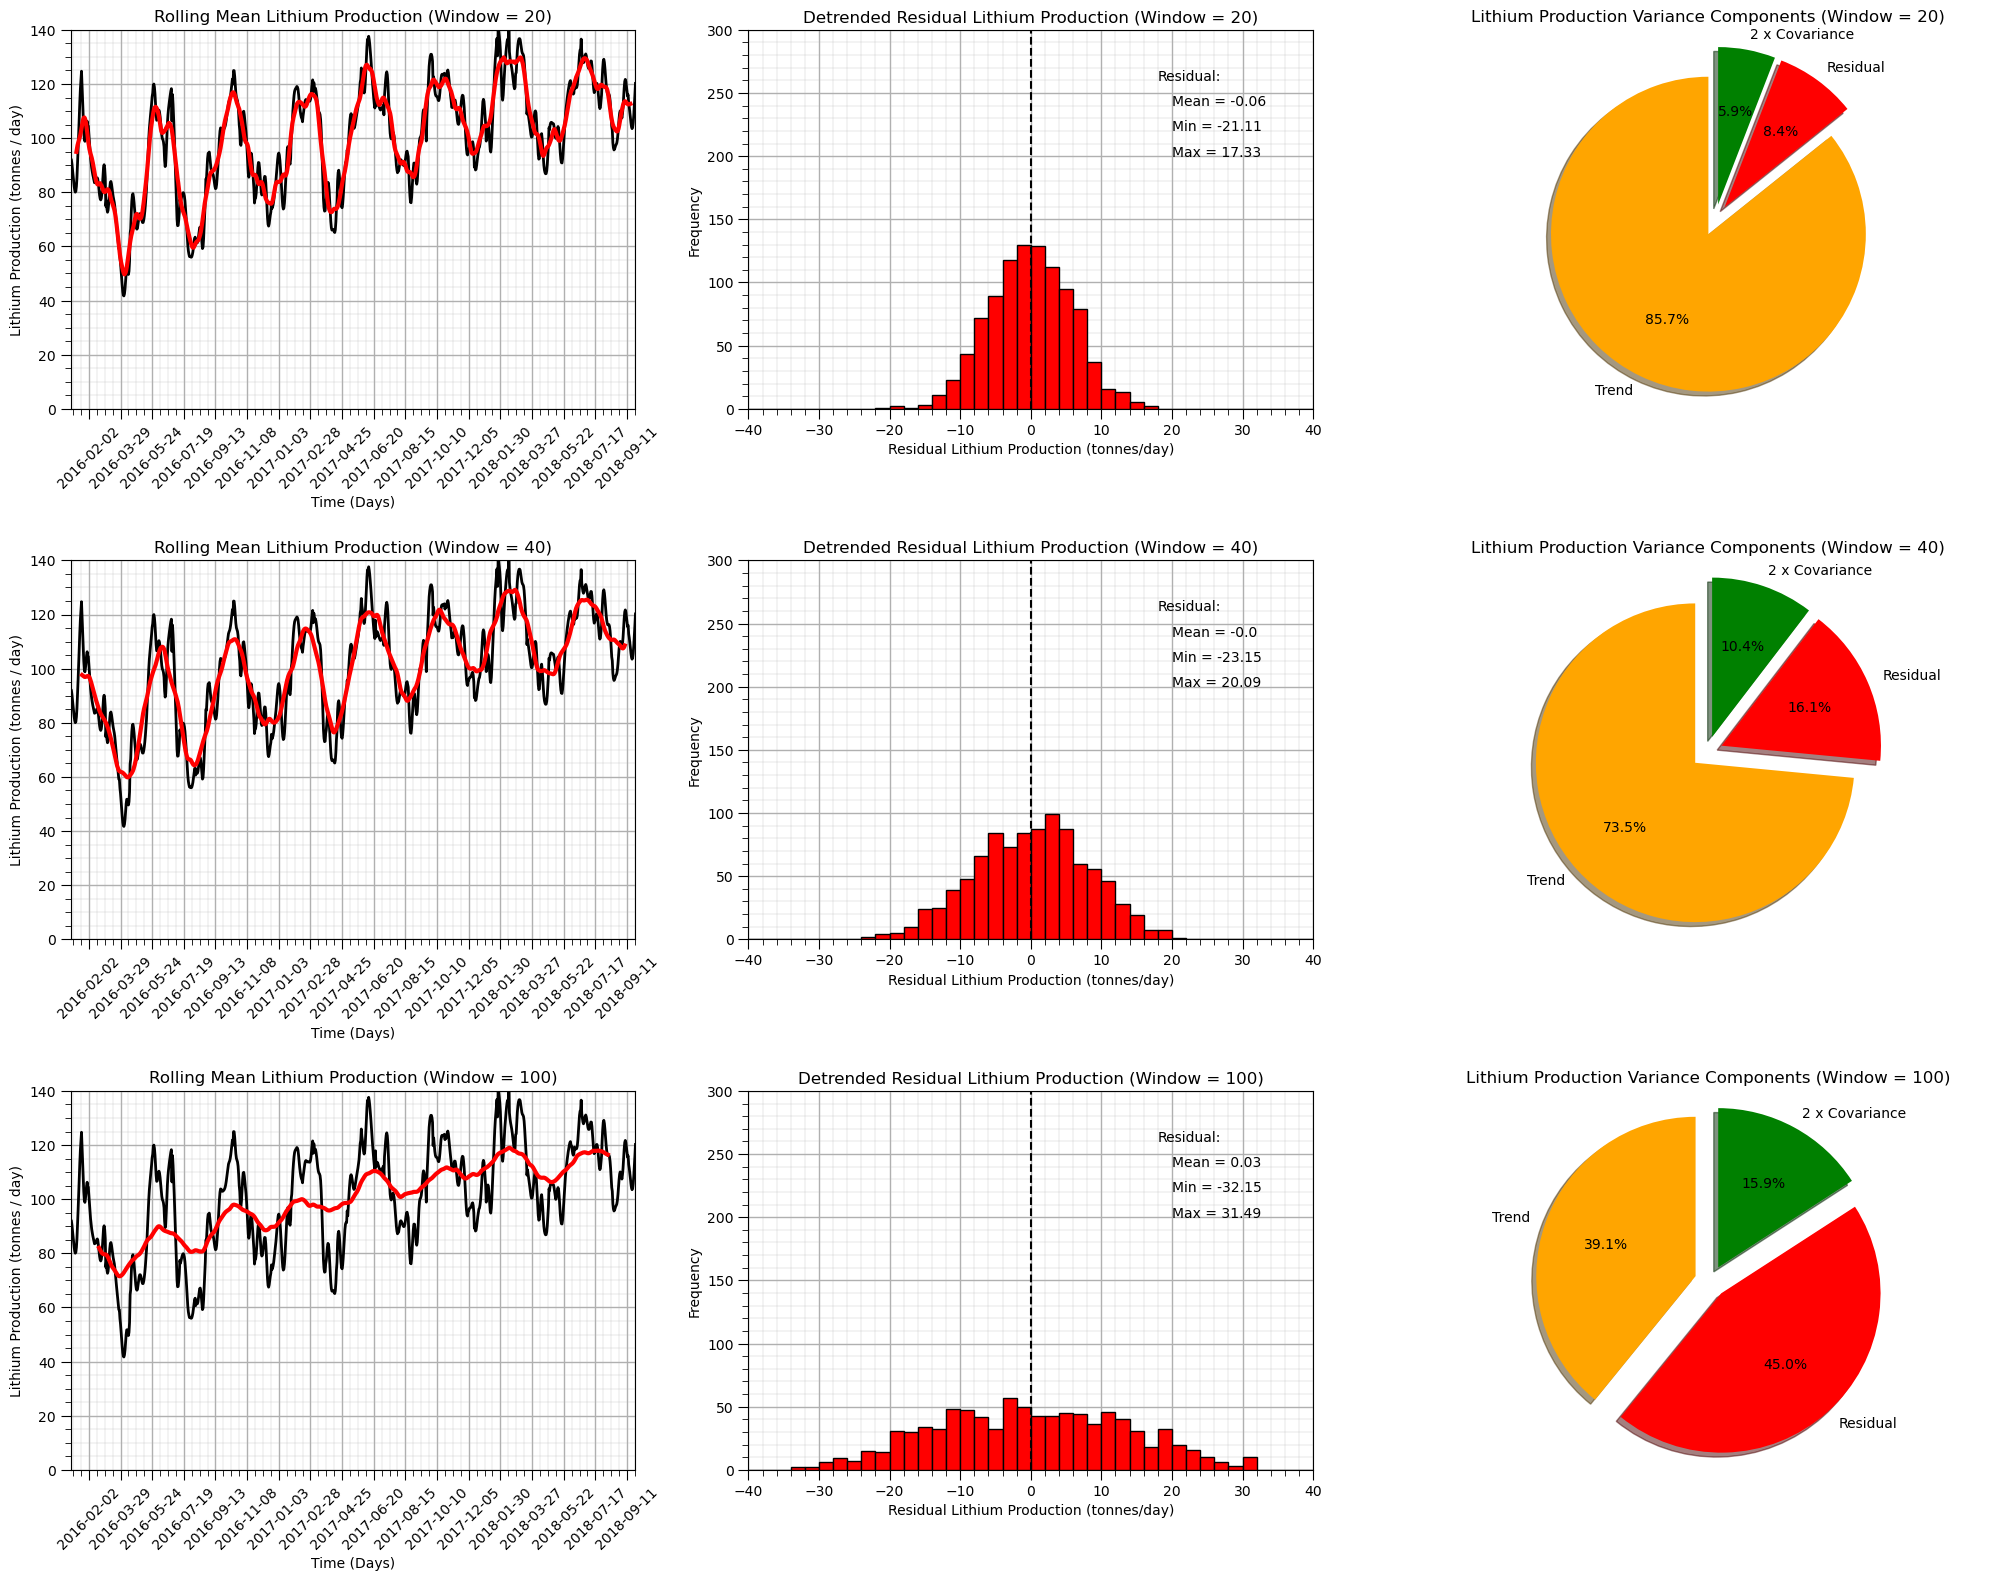

In [29]:
variance = np.var(df['production'])

for iwin,window in enumerate(windows):                        # calculate rolling window mean and residual
    variance_trend = df['rolling_mean_'+str(window)].var()
    variance_residual = df['rolling_res_'+str(window)].var()
    
    prop_trend = variance_trend/variance
    prop_resid = variance_residual/variance
    prop_cov = 1 - prop_trend - prop_resid
    
    variance_prop = [prop_trend, prop_resid, prop_cov]
    labels = 'Trend', 'Residual', '2 x Covariance'
    colors = 'orange', 'red', 'green'
    explode = (0.1, 0.1,0.1)

    plt.subplot(3,3,iwin*3+1)                                 # plot rolling mean    
    ax = df['rolling_mean_'+str(window)].plot(color='red',lw=3,label='Lithium Production',zorder=20)
    df['production'].plot(color='black',lw=2,zorder=10)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))  # major tick every 2 weeks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
    plt.xticks(rotation=45); add_grid(); plt.xlim([date[0],date[-1]]); plt.ylim([0,140])  # rotate date labels for better readability
    plt.xlabel('Time (Days)'); plt.title('Rolling Mean Lithium Production (Window = ' + str(window) + ')')
    plt.ylabel('Lithium Production (tonnes / day)')

    plt.subplot(3,3,iwin*3+2)                                 # plot rolling mean residual distribution
    plt.hist(df['rolling_res_'+str(window)],bins=np.linspace(-40,40,41),color='red',edgecolor='black',alpha=1.0,zorder=10)
    plt.xlim([-40,40]); plt.ylim([0,300]); add_grid()
    plt.vlines(0,0,300,color='black',ls='--',zorder=30)
    plt.xlabel('Residual Lithium Production (tonnes/day)'); plt.ylabel('Frequency')
    plt.title('Detrended Residual Lithium Production (Window = ' + str(window) + ')')
    plt.annotate('Residual:',[18,260])
    plt.annotate('Mean = ' + str(round((df['rolling_res_'+str(window)]).mean(),2)),[20,240])
    plt.annotate('Min = ' + str(round((df['rolling_res_'+str(window)]).min(),2)),[20,220])
    plt.annotate('Max = ' + str(round((df['rolling_res_'+str(window)]).max(),2)),[20,200])
    
    plt.subplot(3,3,iwin*3+3)                                 # plot rolling mean
    plt.pie(variance_prop, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('Lithium Production Variance Components (Window = ' + str(window) + ')')
    plt.gca().axis('equal')                                   # equal aspect ratio ensures that pie plot is drawn as a circle

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.0, wspace=0.2, hspace=0.4); plt.show()

#### Test for Stationarity on the De-trended Time Series

We use the Dickey-Fuller Test to test for stationarity of our detrened time series

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less then the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [31]:
print('Dickey-Fuller Test Results:')
residual = df['residual'] 
residual = residual[~pd.isnull(residual)]                     # remove null values
dftest = adfuller(residual, autolag='AIC')                    # perform Dickey-Fuller test for stationarity
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                -9.362547e+00
p-value                        7.753045e-16
#Lags Used                     8.000000e+00
Number of Observations Used    9.420000e+02
Critical Value (1%)           -3.437311e+00
Critical Value (5%)           -2.864613e+00
Critical Value (10%)          -2.568406e+00
dtype: float64


Now we reject the null hypothesis, $H_0$, and state that the detrended time series is stationary.

#### Differencing to Remove Nonstationarity

Differencing is a common approach applied to tine series to remove nonstationarity. Differencing proceeds as:

$y(\bf{u_i}) = z(\bf{u}_{i+1}) - z(\bf{u}_i)$ 

where $z(\bf{u}_{i+1}) - z(\bf{u}_i)$ is the difference between the current and the next value in the time series.

NumPy has a function for differencing ndarrays.

```python
np.diff(df[0].values)
```

Comments on differencing:

* if the series is already stationary then there is no need to apply differencing

* the order of differencing is the number of differencing operations applied in sequence.  

    * first order is $y_1(\bf{u_i}) = z(\bf{u_{i+1}}) - z(\bf{u_i})$ 

    * second order is $y_2(\bf{u_i}) = y_1(\bf{u_{i+1}}) - y_1(\bf{u_i})$ 

    * third order is $y_3(\bf{u_i}) = y_2(\bf{u_{i+1}}) - y_2(\bf{u_i})$ 

We demonstrate differencing on our production dataset.

We will plot the autocorrelation of the result to demonstrate that we have actually removed the trend. 

* trend structure in autocorrelation is a linear shift over lag distances downward toward 0.0 and beyond into negative values.

In [33]:
diff1 = np.diff(df['production'].values)
diff1 = np.append(diff1,diff1[diff1.size-1])                  # double the last value to keep the length the same
df['first_difference'] = diff1

diff2 = np.diff(df['first_difference'].values)
diff2 = np.append(diff2,diff2[diff2.size-1])                  # double the last value to keep the length the same
df['second_difference'] = diff2
df.head()

,production,rolling_mean,rolling_std,rolling_lower,rolling_upper,residual,rolling_mean_20,rolling_res_20,rolling_mean_40,rolling_res_40,rolling_mean_100,rolling_res_100,first_difference,second_difference
date,,,,,,,,,,,,,,
2016-01-01,92.256458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.129910,-1.403020
2016-01-02,92.126548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.532930,-0.656781
2016-01-03,90.593619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.189710,-0.084540
2016-01-04,88.403908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.274251,0.186395
2016-01-05,86.129658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.087856,0.270389


Now let's plot the:

* original
* first order
* second order

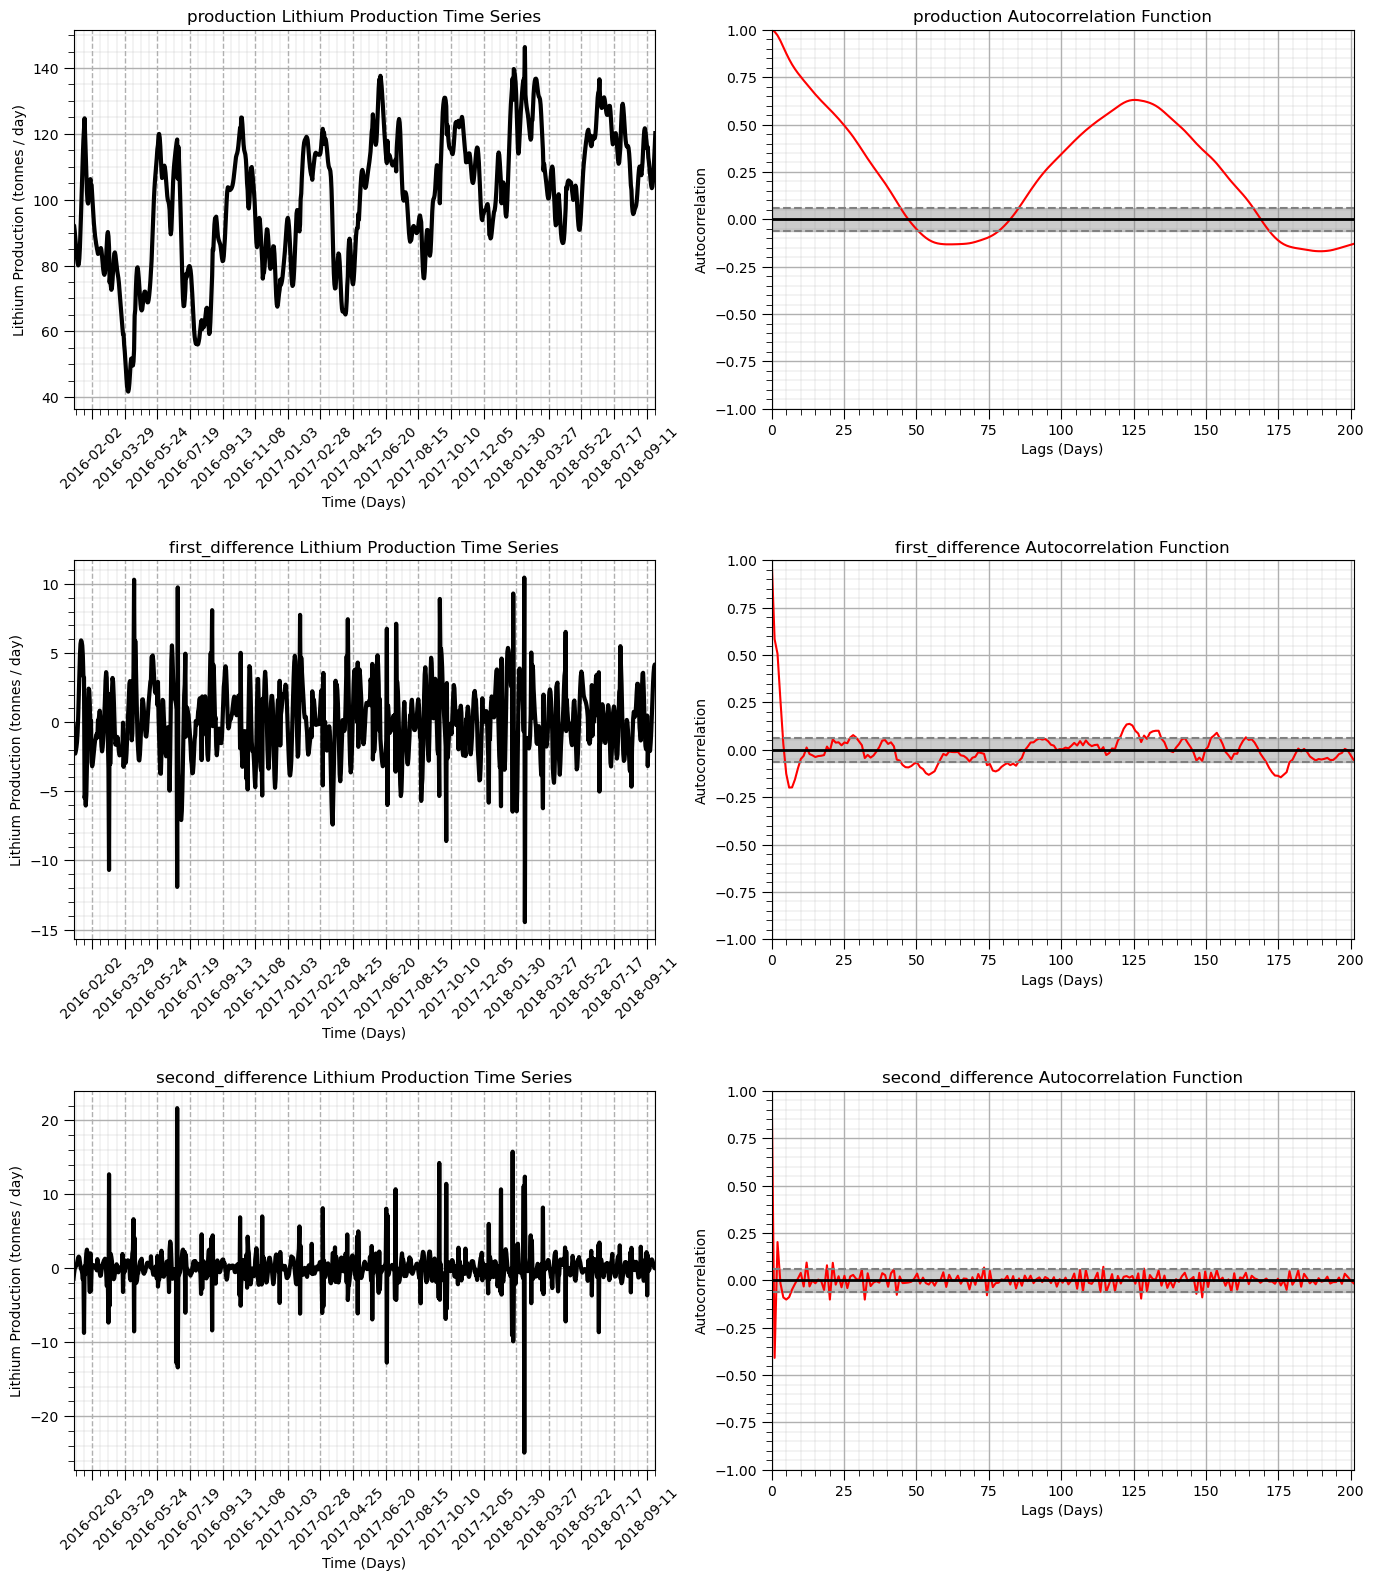

In [40]:
cases = ['production','first_difference','second_difference'] # differencing cases

nlag = 200
lags = np.linspace(0,(nlag+1)*xsiz,nlag+1); prod_lag_acf = []

for icase, case in enumerate(cases):
    prod_lag_acf.append(acf(df[case], nlags=nlag))

    plt.subplot(3,2,icase*2+1)                                # plot values 
    ax = df[case].plot(color='black',lw=3)
    ax.grid(which='major', axis='x', linestyle='--')          # customize major gridlines
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8)) # major tick every 2 weeks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
    plt.xticks(rotation=45); add_grid()                       # rotate date labels for better readability
    plt.xlabel('Time (Days)'); plt.ylabel('Lithium Production (tonnes / day)'); plt.title(case + ' Lithium Production Time Series')

    plt.subplot(3,2,icase*2+2)                                # plot autocorrelation
    plt.plot(lags,prod_lag_acf[icase],color='red')
    plt.axhline(y=0,linewidth = 2,color='black')
    plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
    plt.fill_between(lags,-1.96/np.sqrt(len(series_noise)),1.96/np.sqrt(len(series_noise)),color='grey',alpha=0.4,zorder=1)
    plt.title(case + ' Autocorrelation Function'); plt.xlabel('Lags (Days)'); plt.ylabel('Autocorrelation')
    add_grid(); plt.xlim([0,nlag+1]); plt.ylim([-1.0,1.0])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.4); plt.show()

Observe that the result becomes more stationary as we mover from original production to first difference and then to second difference.

The autocorrelation indicates that the temporal correlation is also removed.

#### Test for Stationarity on the First and Second Differenced Time Series

We use the Dickey-Fuller Test for stationarity of our first and second difference of our production time series

* $H_0 =$ time series is non-stationary
* $H_1 =$ time series is stationary

If the **Test Statistic** is less than the **Critical Value** at an alpha level (1 - significance level) then we reject the null hypothesis and state that the time series is stationary.

In [43]:
print('Dickey-Fuller Test Results - First Differenced Production:')
residual = df['first_difference'] 
residual = residual[~pd.isnull(residual)]                     # remove null values
dftest = adfuller(residual, autolag='AIC')                    # perform Dickey-Fuller test
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

print('Dickey-Fuller Test Results - Second Differenced Production:')
residual = df['second_difference'] 
residual = residual[~pd.isnull(residual)]                     # remove null values
dftest = adfuller(residual, autolag='AIC')                    # perform Dickey-Fuller test
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results - First Differenced Production:
Test Statistic                -1.022681e+01
p-value                        5.151322e-18
#Lags Used                     1.000000e+01
Number of Observations Used    9.890000e+02
Critical Value (1%)           -3.436979e+00
Critical Value (5%)           -2.864467e+00
Critical Value (10%)          -2.568328e+00
dtype: float64
Dickey-Fuller Test Results - Second Differenced Production:
Test Statistic                -1.266754e+01
p-value                        1.265190e-23
#Lags Used                     1.900000e+01
Number of Observations Used    9.800000e+02
Critical Value (1%)           -3.437040e+00
Critical Value (5%)           -2.864494e+00
Critical Value (10%)          -2.568343e+00
dtype: float64


Both the local moving window and differencing methods have demonstrated the ability to remove the trend in the production mean and provide a stationary dataset.

In general, any predictive model will:

* require a stationary time series dataset (assumes stationarity)
* first model and remove a nonstationary component and then work with the stationary residual or transform 

#### Time Series Decomposition

Let's demonstrate an automated method to decompose a time series into multiple components. With time series decomposition we will decompose the time series into the following components.  

* trend
* seasonality
* noise / residual

We will use the [StatsModels](https://www.statsmodels.org/stable/index.html) package for statistical modeling in Python.

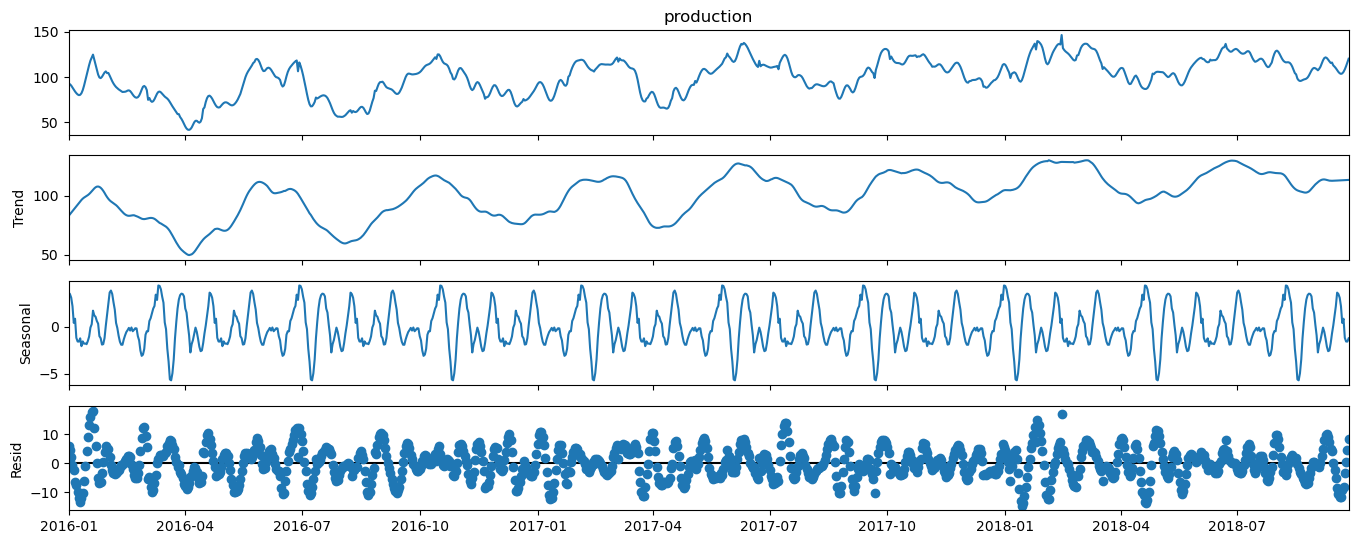

In [46]:
decomposition = seasonal_decompose(df['production'], model='additive',extrapolate_trend=1,period=110,filt=np.ones(20)/20,two_sided = True)
decomp_trend = decomposition.trend; decomp_seasonal = decomposition.seasonal; decomp_residual = decomposition.resid
fig = decomposition.plot()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's also check the variance components, were $t$ is trend, $s$ is seasonal and $r$ is residual.

$$
\sigma^2 = \sigma^2_{t} + \sigma^2_{s} + \sigma^2_{r} + 2 \times C_{t,s} + 2 \times C_{s,r} + 2 \times C_{t,r} 
$$

Due to the covariance terms, we cannot assume that the sum of the variance of the 3 decomposed components will be the original variance. 

* for simplicity, we will ignore the covariance terms and plot the proportions of the sum of variances of trend, seasonal and residual components.

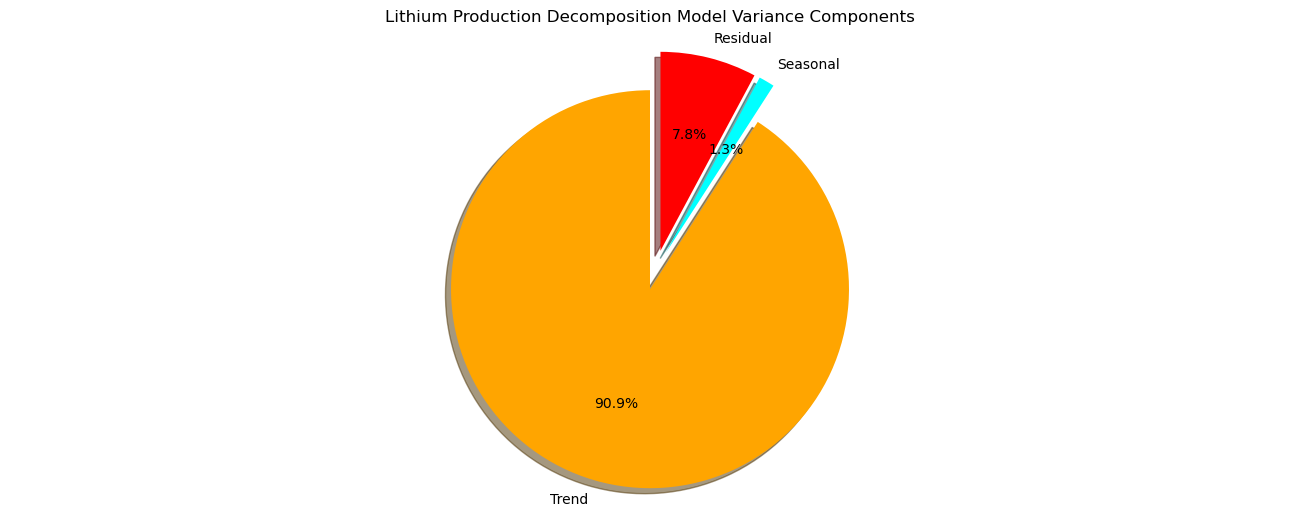

In [48]:
var_decomp_trend = np.var(decomp_trend.values); var_decomp_seasonal = np.var(decomp_seasonal.values) # calculate variance components
var_decomp_residual = np.var(decomp_residual.values); var_total = np.var(df['production'])

variance_prop = [var_decomp_trend, var_decomp_seasonal, var_decomp_residual]
labels = ['Trend', 'Seasonal', 'Residual']; colors = ['orange','cyan','red']; explode = [0.1,0.1,0.1]

plt.subplot(111)                                              # plot the decompositional model variance components
plt.pie(variance_prop, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Lithium Production Decomposition Model Variance Components')
plt.gca().axis('equal')                                       # equal aspect ratio ensures that pie is drawn as a circle.
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

Note, that our model sees the cyclicity that we added to the synthetic data as the trend component and found a higher frequency, lower amplitude cyclicity as the seasonal component and the remaining noise residual component has an amplitude about twice the amplitude of the seasonal and about one fifth the trend amplitude.

Let's check for stationarity of the residual component from the above decomposition. We do this to confirm that we have removed the nonstationarity through removal of the seasonal and trend components.

In [52]:
print('Dickey-Fuller Test Results:')
decomp_residual = decomp_residual[~pd.isnull(decomp_residual)]  # remove null values
df['decomp_res'] = decomp_residual
dftest = adfuller(decomp_residual, autolag='AIC')             # perform Dickey-Fuller test
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput[0:7])

Dickey-Fuller Test Results:
Test Statistic                -9.629883e+00
p-value                        1.622897e-16
#Lags Used                     2.100000e+01
Number of Observations Used    9.780000e+02
Critical Value (1%)           -3.437054e+00
Critical Value (5%)           -2.864500e+00
Critical Value (10%)          -2.568346e+00
dtype: float64


Once again we reject the null hypothesis, $H_0$, and state that the detrended time series is stationary.

* the time series decomposition method has successfully removed the non-stationarity in the mean of the time series

Let's confirm that the trend has been removed with the autocorrelation.

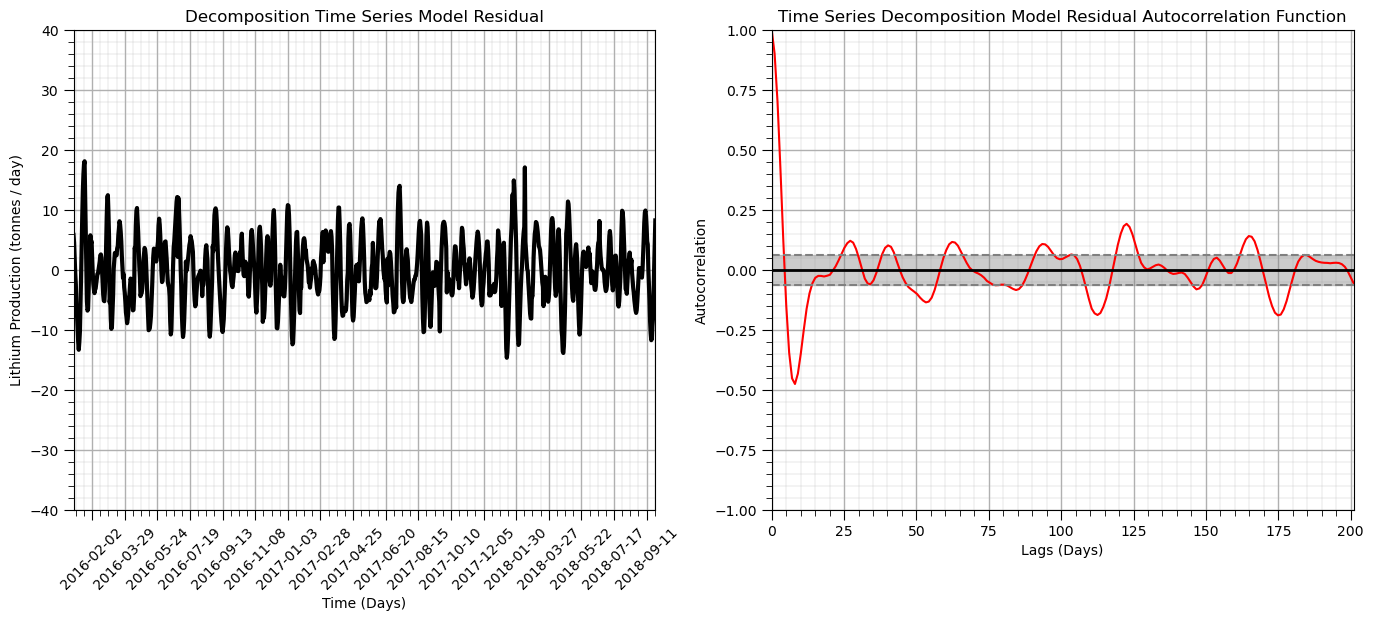

In [55]:
nlags = 200                                                   # number of autocorrelation lags
lag_acf_decomp_resid = acf(decomp_residual, nlags=nlags)      # autocorrelation
lags = np.linspace(0,(nlags+1)*xsiz,nlags+1)

plt.subplot(121)                                              # plot decomposition model residual
ax = df['decomp_res'].plot(color='black',lw=3)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))  # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid(); plt.xlim([date[0],date[-1]]); plt.ylim([-40,40]) # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.title('Decomposition Time Series Model Residual')
plt.ylabel('Lithium Production (tonnes / day)')

plt.subplot(122)                                              # plot autocorrelation of decomposition residual
plt.plot(lags,lag_acf_decomp_resid,color='red')
plt.axhline(y=0,linewidth = 2,color='black')
plt.axhline(y=-1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_noise)),linestyle='--',color='gray')
plt.fill_between(lags,-1.96/np.sqrt(len(series_noise)),1.96/np.sqrt(len(series_noise)),color='grey',alpha=0.4,zorder=1)
plt.title('Time Series Decomposition Model Residual Autocorrelation Function'); plt.xlabel('Lags (Days)'); plt.ylabel('Autocorrelation')
add_grid(); plt.xlim([0,nlag+1]); plt.ylim([-1.0,1.0])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

From these plots we can determine that there is no autocorrelation nor partial autocorrelation over any lag 

* the plot crosses the upper confidence interval for zero autocorrelation at lag = 1

What have we learned about our production data so far?

* there is a significant trend that can be removed with a moving window or first difference

* there is no significant autocorrelation of the 

#### Train and Test Split

Let's split the data with train and test and attempt time series forecasting.

In [62]:
train_frac = 0.8; split_index = int(len(df)*train_frac)       # specify train and test split

train = df['production'][:split_index]                        # perform split
test = df['production'][split_index:]
train_date_list = pd.date_range(start=date[0], end=date[split_index-1]).tolist() # date ranges for train and test for plotting
test_date_list = pd.date_range(start=date[split_index],end=date[len(df)-1]).tolist()

print('Train samples = ' + str(len(train)) + ', Test samples = ' + str(len(test))) # check train and test counts
print('Train samples dates = ' + str(len(train_date_list)) + ', Test samples dates = ' + str(len(test_date_list)))

Train samples = 800, Test samples = 200
Train samples dates = 800, Test samples dates = 200


#### ARIMA (Auto-Regressive Integrated Moving Average) Model for Time Series

The ARIMA model is based on the following parameters:

* number of auto-regressive terms (p) is the number of lags for autocorrelation - we find this from the number of significant lags in the partial autocorrelation.  There was only one lag (see above). $p=1$

* number of moving average terms (q) is the number of differencing required remove the trend.  From above we demonstrated that we had a stationary dataset after the first difference, but we improved the removal of the cycles after the second difference, let's use second difference.  $q = 2$

* number of non-seasonal differences (d) is the seasonal effect, our dataset did not show any significant seasonal cyclicity in the decomposition above, so we will just set it to one.  $d=1$ 

In [192]:
p = 1; d = 0; q = 2                                           # set ARIMA parameters

sP = 1; sD = 1; sQ = 2; s = 5                                 # seasonal orders

ARIMA_model = ARIMA(train, order=(p, d, q),trend='t',seasonal_order=(sP,sD,sQ,s)) # instantiate ARIMA model
ARIMA_model_fit = ARIMA_model.fit()                           # fit ARIM model

print(ARIMA_model_fit.summary())                              # print diagnostics from ARIMA model

                                    SARIMAX Results                                    
Dep. Variable:                      production   No. Observations:                  800
Model:             ARIMA(1, 0, 2)x(1, 1, 2, 5)   Log Likelihood               -1782.678
Date:                         Tue, 08 Oct 2024   AIC                           3581.357
Time:                                 11:06:15   BIC                           3618.784
Sample:                             01-01-2016   HQIC                          3595.739
                                  - 03-10-2018                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0497      0.026      1.943      0.052      -0.000       0.100
ar.L1          0.9844      0.009    109.383      0.000     

Here's what we can interpret from above.  

* the coefficients AR.1, MA.1 and MA.2 are all significant, the model based on trend and autocorrelation is significant
* the constant is not significantly different from zero

Note the AIC is the Akaike Information Criteria (AIC) that quantifies:

1. the goodness of fit
2. the simplicity / parsimony

The lower the AIC the better.

Let's plot the residuals from our model to check for a constant mean (near zero) and variance.  

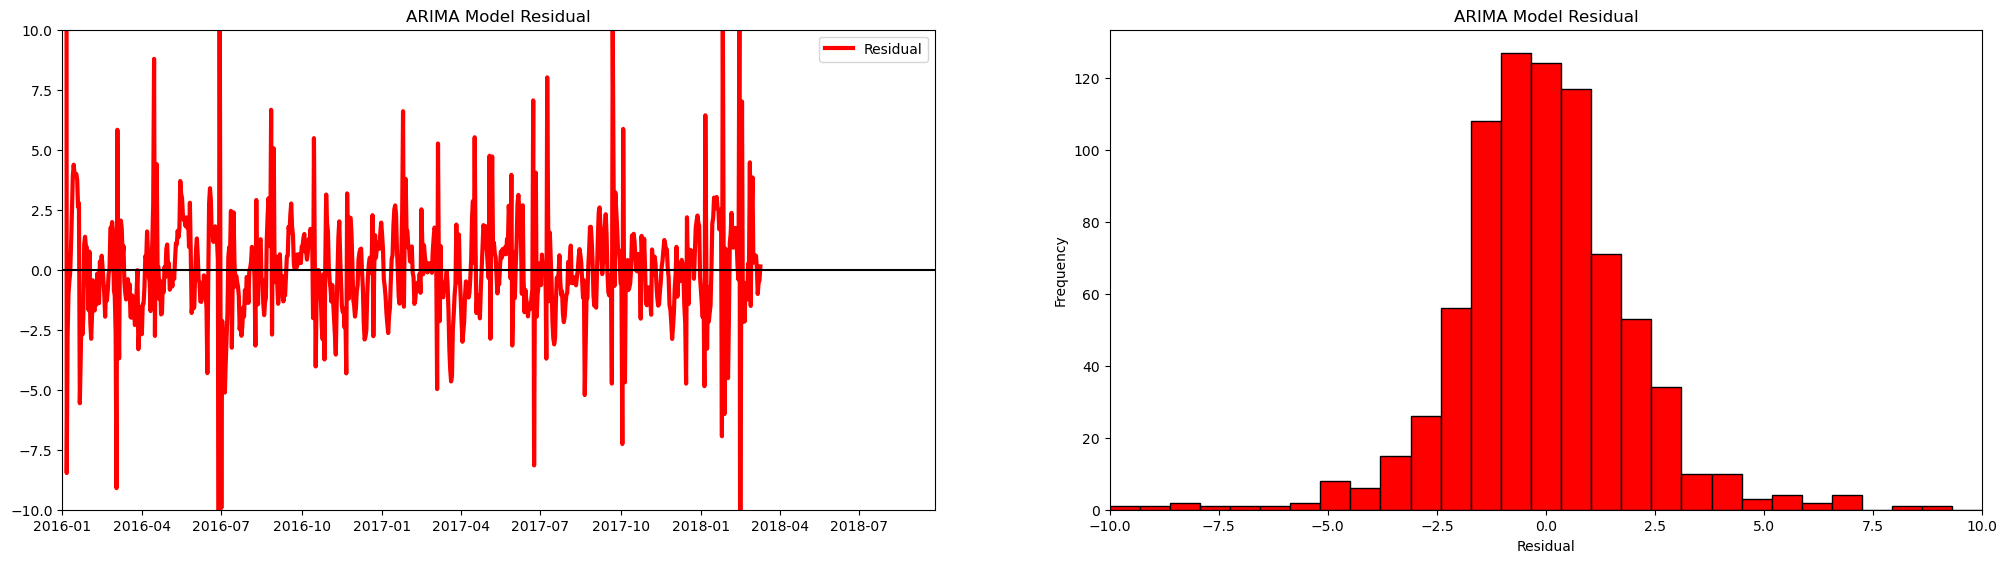

In [195]:
residuals = pd.DataFrame(ARIMA_model_fit.resid)               # add ARIMA residuals to DataFrame

plt.subplot(121)                                              # plot ARIMA residuals
orig = plt.plot(residuals, color='red',linewidth = 3, label='Residual')
plt.plot([date[0],date[-1]],[0,0],color='black')
plt.title('ARIMA Model Residual'); plt.legend(loc='best'); plt.ylim(-10,10); plt.xlim([date[0],date[-1]])

plt.subplot(122)                                               # plot histogram of ARIMA residuals
plt.hist(residuals[0].values,bins = np.linspace(-10,10,30),color = 'red',alpha = 1.0,edgecolor = 'black')
plt.xlabel('Residual'); plt.ylabel('Frequency'); plt.title('ARIMA Model Residual'), plt.xlim(-10,10)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's look at the predictions from our model.

* this is the predictions our model would make if we trained with $y(\bf{u_{\alpha}})$, for $\alpha = 1, \dots, i-1$, to predict at $y(\bf{u_i})$ 

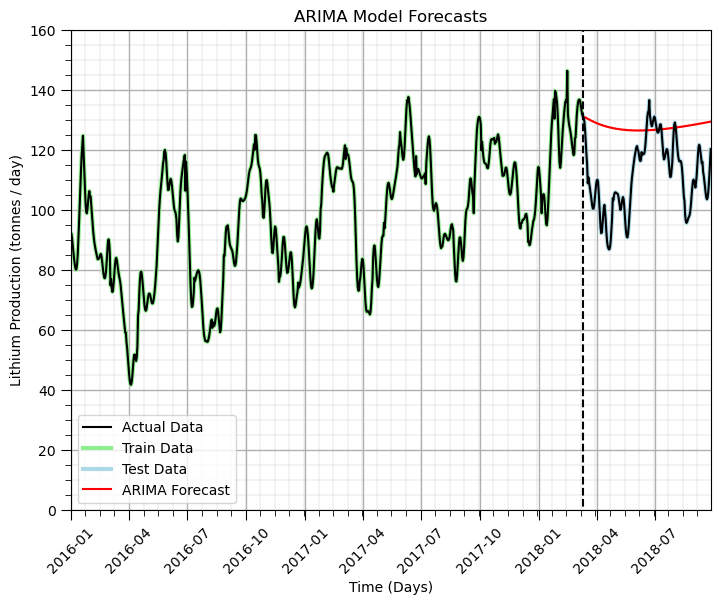

In [198]:
forecast_steps = 200                                          # number of forecast steps

forecast = ARIMA_model_fit.forecast(steps=forecast_steps)
forecast_date_list = pd.date_range(start=test_date_list[0], end=test_date_list[0] + pd.Timedelta(days=forecast_steps-1)).tolist()

plt.subplot(111)                                              # plot data, train and test and ARIMA forecast
plt.plot(date_list,df['production'],color='black',label='Actual Data',zorder=10) # plot data
plt.plot(train_date_list,train.values,lw=3,color='lightgreen',label='Train Data',zorder=1) # plot data
plt.plot(test_date_list,test.values,lw=3,color='lightblue',label='Test Data',zorder=1) # plot data
plt.plot(forecast_date_list,forecast.values, label='ARIMA Forecast', color='red') # plot forecast
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))  # major tick every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # set the date format for the major ticks
plt.xticks(rotation=45); add_grid(); plt.ylim([0,160])  # rotate date labels for better readability
plt.xlabel('Time (Days)'); plt.title('Decomposition Time Series Model Residual')
plt.ylabel('Lithium Production (tonnes / day)'); plt.xlim(date_list[0],date_list[-1])
plt.plot([test_date_list[0],test_date_list[0]],[-40,160],color='black',ls='--') # vertical line at end of train time period
plt.title('ARIMA Model Forecasts'); plt.ylabel('Lithium Production (tonnes / day)'); plt.xlabel('Time (Days)')
plt.legend(loc='lower left')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Some observations about our ability to forecast:

* the general linear trend with increasing production was captured by the model
* the short term forecast is quite good, but fails to capture the cycles, we could increase the number of periods in the seasons, but that dramatically increases the run time and was impractical with this e-book.

We could have improved model performance by manually removing the trend and cycle and modeling the residual. Also, more could be done with Python packages for autotuning ARIMA models (e.g., pmdarima package).

#### Time Series Analysis and Modeling Summary 

Here's some observations:

* We need to check time series data for stationarity
* If time series are nonstationary we should mitigate this with trend removal or differencing
* We can measure the degree of temporal correlation and see nonstationarity or trend structures with autocorrelation 
* ARIMA models allow us to simultaneously capture trend, seasonality and residual components in a single model

#### Comments

Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources).
  
I hope this was helpful,

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)